# 군집 평가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 센트로이드 초기화
- 센트로이드 초기화에 따라 알고리즘 수렴의 최적화를 보장하지 못할 수 있다


[운 나쁜 센트로이드 초기화 때문에 최적이 아닌 솔루션 사례]
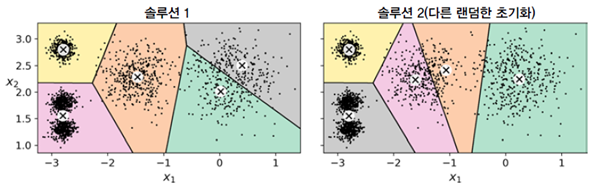

### 5개 클러스터를 갖는 가상데이터 군집화

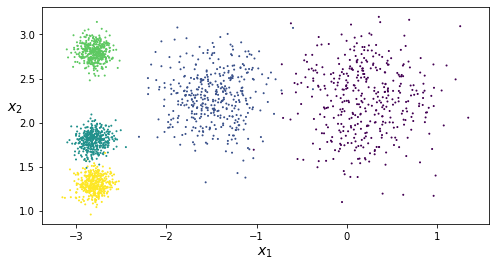

In [2]:
# 지정한 중심을 갖는 5개 클러스터로 된 데이터셋 2000개 생성
from sklearn.datasets import make_blobs

# 5개 중심점 좌표 설정

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(8, 4))

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()


**K-Means 수행**

클러스터 센터: [[-2.8   1.3 ]
 [ 0.21  2.26]
 [-2.79  2.8 ]
 [-1.47  2.29]
 [-2.8   1.8 ]]


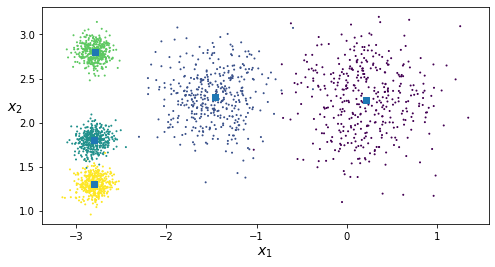

In [3]:
# K-means 
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# 클러스터 센터
k_centers = kmeans.cluster_centers_
print('클러스터 센터:',np.round(k_centers, 2))

# 클러스터 중심을 시각화
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(k_centers[:,0], k_centers[:, 1], marker='s')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()


### 센트로이드 초기화 방법
: 센트로이드 위치를 근사하게 알 수 있다면 최적의 솔루션을 반환할 수 있다

**방법1.** 다른 군집 알고리즘을 먼저 실행하여 근사한 센트로이드 위치를 결정
- `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, `n_init`를 1로 설정

**다른 군집 알고리즘을 먼저 실행하여 근사한 센트로이드 위치를 결정하여 군집 수행**

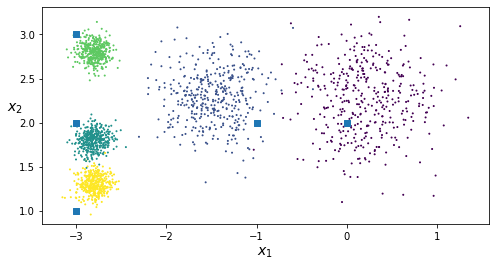

In [4]:
# good_init = kmeans.cluster_centers_
good_init = np.array([[-3, 3,],[-3, 2],[-3,1],[-1,2],[0,2]])
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(good_init[:,0], good_init[:, 1], marker='s')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

In [5]:
kmeans_good_init = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_good_init.fit(X)
k_centers = kmeans_good_init.cluster_centers_
print('클러스터 센터 :', np.round(k_centers, 2))

클러스터 센터 : [[-2.79  2.8 ]
 [-2.8   1.8 ]
 [-2.8   1.3 ]
 [-1.47  2.29]
 [ 0.21  2.26]]


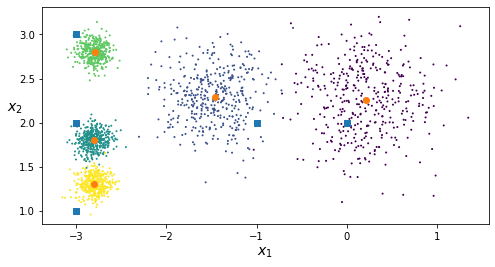

In [6]:
good_init = np.array([[-3, 3,],[-3, 2],[-3,1],[-1,2],[0,2]])
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(good_init[:,0], good_init[:, 1], marker='s')
plt.scatter(k_centers[:,0], k_centers[:,1], marker='o')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

In [7]:
kmeans_good_init2 = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_good_init2.fit(X)
k_centers2 = kmeans_good_init2.cluster_centers_
print('클러스터 센터 :', np.round(k_centers2, 2))

클러스터 센터 : [[-2.79  2.8 ]
 [-2.8   1.8 ]
 [-2.8   1.3 ]
 [-1.47  2.29]
 [ 0.21  2.26]]


**방법2.** 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택
- 랜덤 초기화 횟수 지정
    - KMeans( ) 메서드에서 매개변수 `n_init`로 조절
    - n_init 기본값은 10

**max_iter 변화시키면서 군집 수행**

In [8]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=1, random_state=0)
kmeans_iter1.fit(X)

kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=2, random_state=0)
kmeans_iter2.fit(X)

kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=3, random_state=0)
kmeans_iter3.fit(X)


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

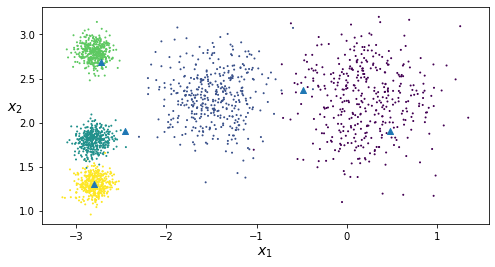

In [9]:
k_centers_i1 = kmeans_iter1.cluster_centers_

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(k_centers_i1[:,0], k_centers_i1[:, 1], marker='^')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

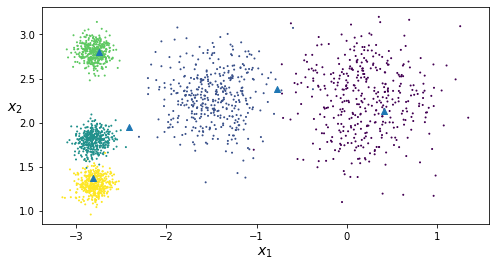

In [10]:
k_centers_i2 = kmeans_iter2.cluster_centers_

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(k_centers_i2[:,0], k_centers_i2[:, 1], marker='^')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

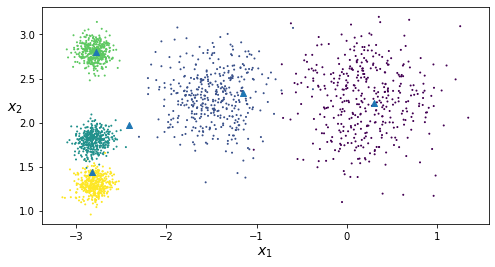

In [11]:
k_centers_i3 = kmeans_iter3.cluster_centers_

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(k_centers_i3[:,0], k_centers_i3[:, 1], marker='^')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

## K-평균의 최적 솔루션 성능 지표
- 이너셔(inertia) : 각 샘플과 가까운 센트로이드 사이의 평균 제곱 거리


- 이너셔가 가장 작은 모델이 최적
- KMeans 클래스의 `inertia_` 인스턴스 변수에 이너셔값을 저장

**군집 결과의 이너셔(inertia) 비교**

In [12]:
kmeans_good_init2.inertia_

211.5985372581683

In [13]:
kmeans_iter1.inertia_

482.1581517499828

In [14]:
kmeans_iter2.inertia_

373.02417790615374

In [15]:
kmeans_iter3.inertia_

279.3458667051408

**score() 메서드** : 이너셔의 음수값을 반환
- 사이킷런은 큰 값이 좋은 값이라는 규칙에 따라 이너셔의 음수값을 반환

In [16]:
# 이너셔의 음수값을 반환
kmeans_iter3.score(X)

-279.3458667051407

## K-means++ 알고리즘
- 데이비드 아서(David Arthur) & 세르게이 바실비츠키(Sergei Vassilvitskii) 2006년 제안
- 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 제시
- 최적의 솔루션을 찾기 위한 실행 알고리즘의 반복 횟수를 크게 줄일 수 있으므로
- 초기화 단계에 드는 시간이 충분한 가치가 있는 알고리즘

- KMeans 클래스는 `K-means ++ 초기화 알고리즘을 사용`함
- 이 방식을 사용하고 싶지 않은 경우 `init` 매개변수를 `'random'`으로 지정

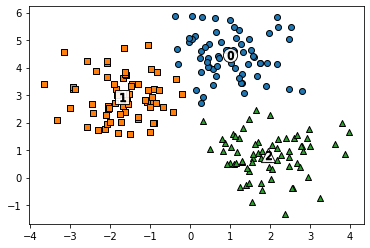

In [17]:
# 군집이 3개, 피처가 2개 200개 샘플 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

# KMeans++ 클러스터링 수행

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)

clusterDF = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

## K-평균 속도 개선과 미니배치 k-평균

**미니배치를 사용한 K평균**
- 2010년 데이비드 스컬리(David Sculley) 제안
- 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동
- 알고리즘 속도를 3배에서 4배 정도 높임
- 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음
- 사이킷런의 `MiniBatchKMeans` 클래스

In [18]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)


C:\Users\82103\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [19]:
minibatch_kmeans.inertia_

182.5861023853593

## 최적의 클러스터 개수 찾기

### 방법1. 이너셔가 작아지는 모델 선택

- 이너셔는 k가 증가함에 따라 점점 작아지므로 k선택할 때 좋은 성능 지표가 아님

In [20]:
# make_blobs 을 통해 clustering 을 위한 
# 5개의 클러스터 중심의 2000개 2차원 데이터 셋 생성 

from sklearn.datasets import make_blobs
import numpy as np

# 5개 중심점 좌표 설정

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# make_blobs 을 통해 
# 지정한 중심을 갖는 5개 클러스터로 된 데이터셋 2000개 생성

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [21]:
# k를 1~10까지 적용한 KMeans 모델 생성
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

**k=1~10인 KMeans 모델별 이너셔에 대한 그래프 작성**

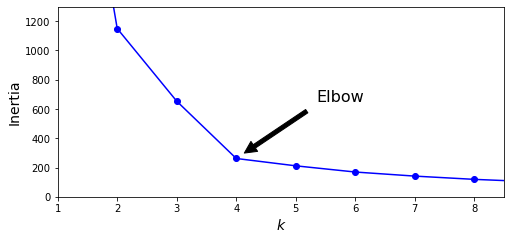

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

### 방법2. 실루엣 점수(silhouette score)
: 모든 샘플에 대한 실루엣 계수의 평균

실루엣계수 $ = \frac {(b-a)}{max(a,b)}$
- a : 동일한 클러스터에 있는 다른 샘플까지 평균 거리
    - 클러스터 내부의 평균 거리
- b : 가장 가까운 클러스터까지 평균 거리
    - 가장 가까운 클러스터의 샘플까지 평균거리
    - 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터
 

실루엣계수 : -1 ~ +1
- +1 에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있음을 나타냄
- 0에 가까우면 클러스터 경계에 위치함을 나타냄
- -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었음을 의미함

### 실루엣계수 계산 : silhouette_score() 함수

silhouette_score(샘플, 할당된레이블)

In [23]:
from sklearn.metrics import silhouette_score

k=5
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

### 클러스터 개수에 따른 실루엣 점수 비교

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

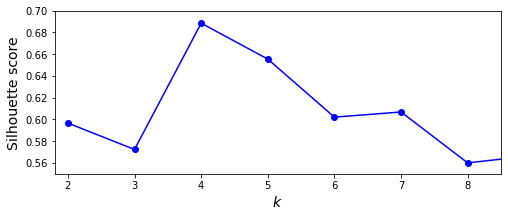

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


### 실루엣 다이어그램
- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계수값으로 정렬하여 그린 그래프
- 클러스터마다 칼 모양의 그래프가 그려짐
- 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수
- 그래프의 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄
    - 너비가 넓을수록 좋음

In [27]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 
### 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 
    # 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 
        # 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

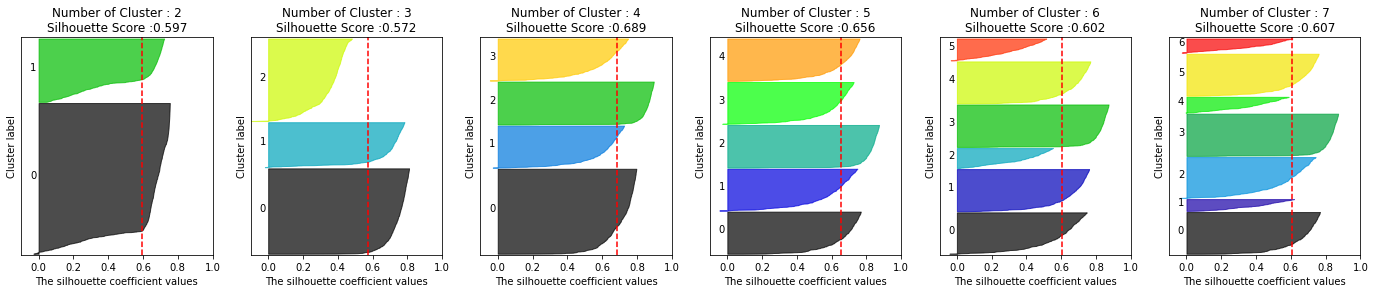

In [28]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5, 6, 7], X)

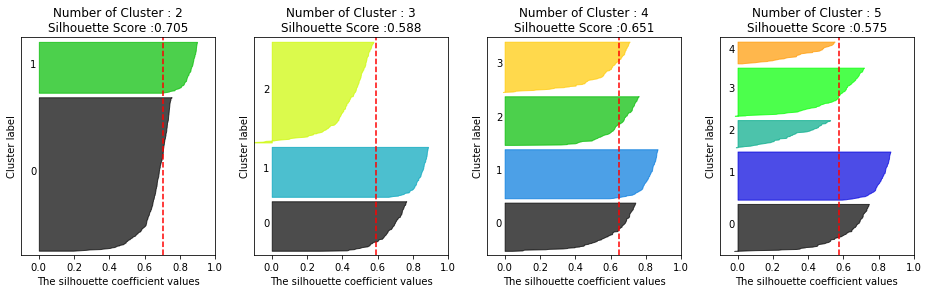

In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

In [30]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 
# 500개 2차원 데이터 셋 생성  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 


### iris dataset에 대한 KMeans 적용한 경우 실루엣 다이어그램

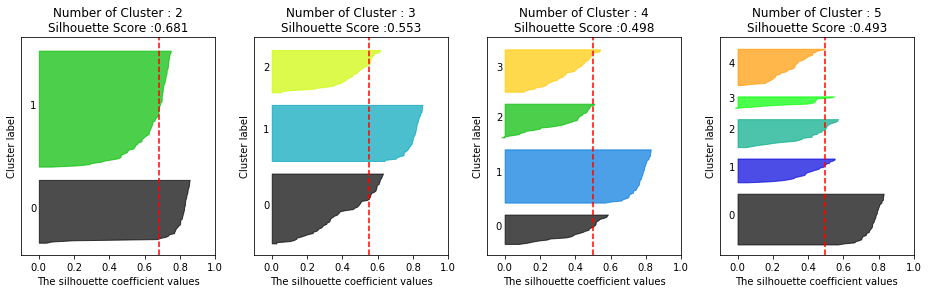

In [31]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5], iris.data)
